### **Importing necessary libraries**

In [18]:
install.packages('readr')
install.packages('proxy')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
library(readr)
library(proxy)


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




### **Importing the data**

In [9]:
df_usa <- read_csv("/content/merged_usa_dataset.csv")

head(df_usa)

Rows: 57 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Entity
dbl (21): Year, Renewables (% electricity), Renewables (% equivalent primary...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Entity,Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),⋯,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
United States,1965,0,4.368870,0,0,4.074629,397.9482,0,0,⋯,0,13.33223,13.33223,0,0,198.9741,0,0,0,0
United States,1966,0,4.171402,0,0,3.877466,399.8738,0,0,⋯,0,14.06201,14.06201,0,0,199.9369,0,0,0,0
United States,1967,0,4.542216,0,0,4.258249,454.4416,0,0,⋯,0,14.07357,14.07357,0,0,227.2208,0,0,0,0
United States,1968,0,4.330974,0,0,4.035142,456.3094,0,0,⋯,0,15.54604,15.54604,0,0,228.1547,0,0,0,0
United States,1969,0,4.598878,0,0,4.305610,512.0571,0,0,⋯,0,16.22706,16.22706,0,0,256.0285,0,0,0,0
United States,1970,0,4.400803,0,0,4.117218,506.9847,0,0,⋯,0,16.23590,16.23590,0,0,253.4924,0,0,0,0


### **Data Preparation:**

In [5]:
# Print the structure of the data
str(df_usa)

spc_tbl_ [57 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Entity                                    : chr [1:57] "United States" "United States" "United States" "United States" ...
 $ Year                                      : num [1:57] 1965 1966 1967 1968 1969 ...
 $ Renewables (% electricity)                : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Renewables (% equivalent primary energy)  : num [1:57] 4.37 4.17 4.54 4.33 4.6 ...
 $ Biofuels Production - TWh - Total         : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Solar (% electricity)                     : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Hydro (% equivalent primary energy)       : num [1:57] 4.07 3.88 4.26 4.04 4.31 ...
 $ Electricity from hydro (TWh)              : num [1:57] 398 400 454 456 512 ...
 $ Electricity from wind (TWh)               : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Hydro (% electricity)                     : num [1:57] 0 0 0 0 0 0 0 0 0 0 ...
 $ Wind (% electricity)                      : num [1:57] 0 0 0

In [6]:
# Print the column names
print(colnames(df_usa))

 [1] "Entity"                                    
 [2] "Year"                                      
 [3] "Renewables (% electricity)"                
 [4] "Renewables (% equivalent primary energy)"  
 [5] "Biofuels Production - TWh - Total"         
 [6] "Solar (% electricity)"                     
 [7] "Hydro (% equivalent primary energy)"       
 [8] "Electricity from hydro (TWh)"              
 [9] "Electricity from wind (TWh)"               
[10] "Hydro (% electricity)"                     
[11] "Wind (% electricity)"                      
[12] "Solar Capacity"                            
[13] "Electricity from solar (TWh)"              
[14] "Other renewables including bioenergy (TWh)"
[15] "Geo Biomass Other - TWh"                   
[16] "Solar Generation - TWh"                    
[17] "Wind Generation - TWh"                     
[18] "Hydro Generation - TWh"                    
[19] "Geothermal Capacity"                       
[20] "Wind (% equivalent primary energy)"        


##### **Dropping the Entity column as it's all United States and it isn't really required to perform analysis**

In [7]:
# Drop the 'Entity' column
df_usa <- df_usa[ , !(names(df_usa) %in% 'Entity')]

In [8]:
# Print the first few rows
head(df_usa)

Year,Renewables (% electricity),Renewables (% equivalent primary energy),Biofuels Production - TWh - Total,Solar (% electricity),Hydro (% equivalent primary energy),Electricity from hydro (TWh),Electricity from wind (TWh),Hydro (% electricity),Wind (% electricity),⋯,Electricity from solar (TWh),Other renewables including bioenergy (TWh),Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Geothermal Capacity,Wind (% equivalent primary energy),Wind Capacity,Solar (% equivalent primary energy)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1965,0,4.368870,0,0,4.074629,397.9482,0,0,0,⋯,0,13.33223,13.33223,0,0,198.9741,0,0,0,0
1966,0,4.171402,0,0,3.877466,399.8738,0,0,0,⋯,0,14.06201,14.06201,0,0,199.9369,0,0,0,0
1967,0,4.542216,0,0,4.258249,454.4416,0,0,0,⋯,0,14.07357,14.07357,0,0,227.2208,0,0,0,0
1968,0,4.330974,0,0,4.035142,456.3094,0,0,0,⋯,0,15.54604,15.54604,0,0,228.1547,0,0,0,0
1969,0,4.598878,0,0,4.305610,512.0571,0,0,0,⋯,0,16.22706,16.22706,0,0,256.0285,0,0,0,0
1970,0,4.400803,0,0,4.117218,506.9847,0,0,0,⋯,0,16.23590,16.23590,0,0,253.4924,0,0,0,0


#### **As we are performing clustering it requires only unlabeled dataset, so let us remove the labels in our dataset**

In [13]:
# Create a new DataFrame without column names
df <- data.frame(df_usa)
names(df) <- NULL

In [14]:
head(df)

1,United States,1965,0,4.368870,0,0,4.074629,397.9482,0,0,⋯,0,13.33223,13.33223,0,0,198.9741,0,0,0,0
2,United States,1966,0,4.171402,0,0,3.877466,399.8738,0,0,⋯,0,14.06201,14.06201,0,0,199.9369,0,0,0,0
3,United States,1967,0,4.542216,0,0,4.258249,454.4416,0,0,⋯,0,14.07357,14.07357,0,0,227.2208,0,0,0,0
4,United States,1968,0,4.330974,0,0,4.035142,456.3094,0,0,⋯,0,15.54604,15.54604,0,0,228.1547,0,0,0,0
5,United States,1969,0,4.598878,0,0,4.305610,512.0571,0,0,⋯,0,16.22706,16.22706,0,0,256.0285,0,0,0,0
6,United States,1970,0,4.400803,0,0,4.117218,506.9847,0,0,⋯,0,16.23590,16.23590,0,0,253.4924,0,0,0,0


#### **Scaling the dataset:**

In [15]:
# Assuming df_usa is your data frame
# Extract numerical columns (excluding any non-numeric columns)
numeric_cols <- sapply(df_usa, is.numeric)
df_usa_numeric <- df_usa[, numeric_cols]

# Scale the numeric columns using the scale function
df_usa_scaled <- scale(df_usa_numeric)

# If you want to replace the original numeric columns with scaled values
df_usa[, numeric_cols] <- df_usa_scaled

### **Hierarchical Clustering**

In [20]:
# Compute the cosine distance matrix
dist_matrix <- proxy::dist(df_usa_scaled, method = "cosine")

# Print the distance matrix
print(dist_matrix)

              1            2            3            4            5
2  0.0019050100                                                    
3  0.0242042002 0.0309216857                                       
4  0.0215159010 0.0233816797 0.0031361887                          
5  0.1199006173 0.1293267526 0.0379635523 0.0443754993             
6  0.1024317688 0.1070545675 0.0310244858 0.0313294521 0.0034574171
7  0.2200145415 0.2306406540 0.1031980960 0.1113850250 0.0166137594
8  0.2674051008 0.2756957978 0.1394761372 0.1446346895 0.0338225412
9  0.2639481157 0.2675147945 0.1412964249 0.1403295903 0.0384145661
10 0.5313519709 0.5482959544 0.3501947814 0.3672790034 0.1685475261
11 0.5259969647 0.5452077395 0.3452007653 0.3652860253 0.1665573610
12 0.3769771008 0.3851738601 0.2259416250 0.2311186203 0.0844145426
13 0.0719007545 0.0529243195 0.0937455060 0.0642027282 0.1646279276
14 0.3545195506 0.3558249060 0.2156356408 0.2118191793 0.0849070141
15 0.3572633491 0.3571060246 0.2203208537 0.2145

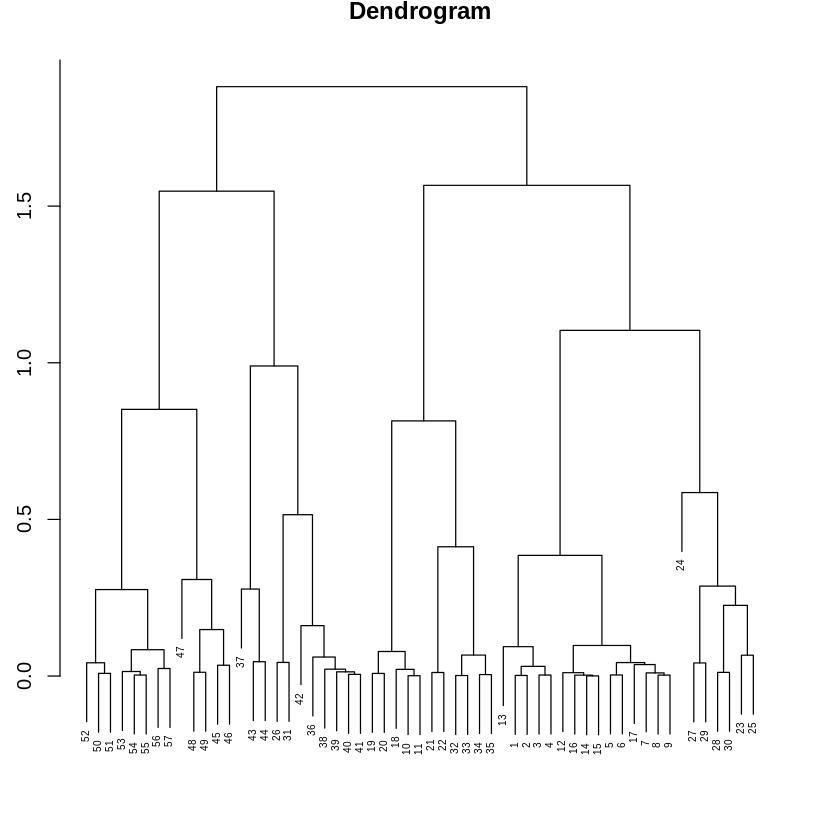

In [24]:
hc <- hclust(as.dist(dist_matrix))

# Plot the dendrogram
par(pin = c(6,6))

# Now create your plot
plot(hc, main = "Dendrogram", xlab = "Sample Index", sub = "", cex = 0.5)